# Classification model 
*to sort males and females based on height and weight*

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
df = pd.read_csv('./male_female.csv')

## Data Pre-processing

### Column renaming

In [305]:
df = df.rename(str.lower, axis=1)

In [306]:
df.head()

,height,weight,sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male


### Outlier removal

<Axes: xlabel='weight', ylabel='height'>

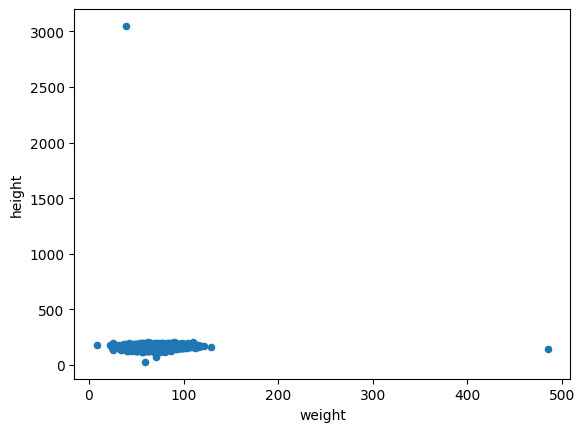

In [307]:
df.plot.scatter(x="weight", y="height")

In [308]:
df = df.drop(592, axis=0)

In [309]:
df = df.drop(1954, axis=0)

<Axes: xlabel='weight', ylabel='height'>

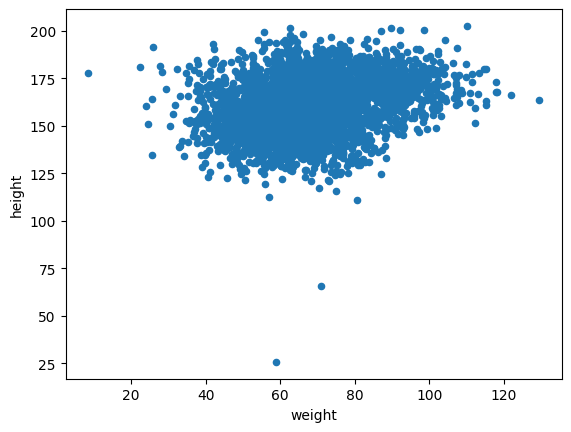

In [310]:
df.plot.scatter(x="weight", y="height")

In [311]:
df = df.drop(df[df['height'] < 100].index)

In [312]:
df = df.drop(df[df['weight'] <= 30].index)

In [313]:
df = df.drop(df[df['weight'] >= 120].index)

<Axes: xlabel='weight', ylabel='height'>

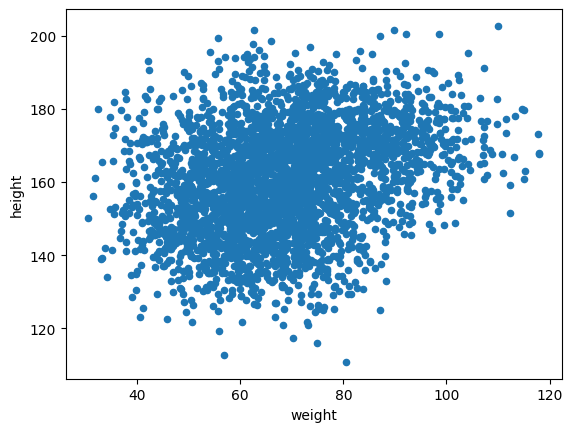

In [314]:
df.plot.scatter(x="weight", y="height")

<Axes: >

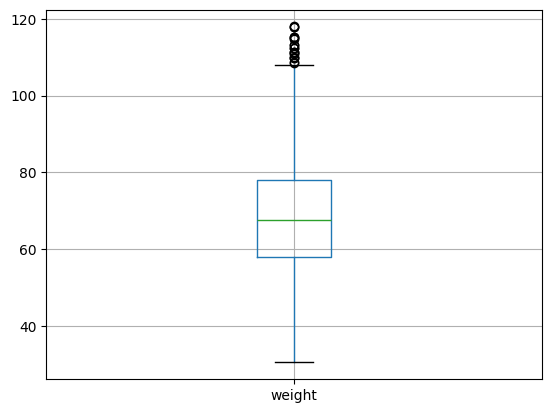

In [315]:
# Not removing the rest of the outliers since they are true outliers
 
df.boxplot(column="weight")

<Axes: >

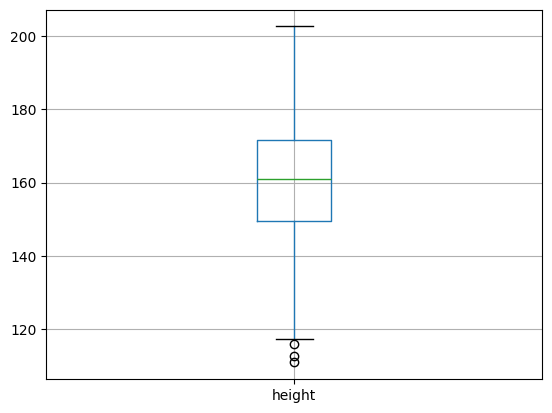

In [316]:
# Not removing the rest of the outliers since they are true outliers

df.boxplot(column="height")

### Text to number

In [317]:
with pd.option_context("future.no_silent_downcasting", True):
    df['sex'] = df['sex'].replace({"Female": 1, "Male": 0}).infer_objects(copy=False)

In [318]:
df.head()

,height,weight,sex
0,165.65,35.41,1
1,148.53,74.45,1
2,167.04,81.22,0
3,161.54,71.47,0
4,174.31,78.18,0


## Model building

### Train-test-split

In [319]:
y = df['sex']
x = df.drop('sex', axis=1)

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

## Fitting the model

In [321]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [322]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [323]:
logreg_train_pred = logreg.predict(X_train)
logreg_test_pred = logreg.predict(X_test)

## Confusion matrix/classification report

In [324]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

cnf_matrix = confusion_matrix(Y_test, logreg_test_pred)

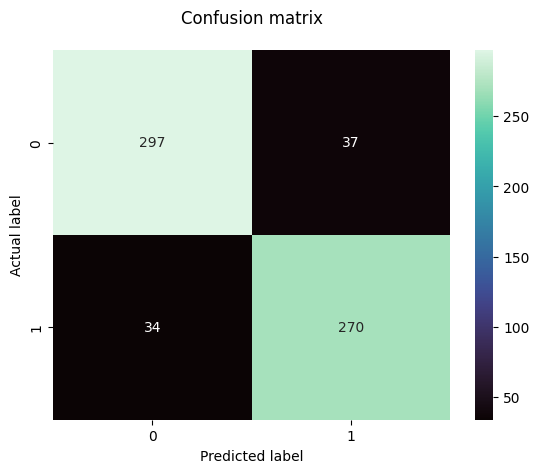

In [325]:
fig, ax = plt.subplots()
plt.xticks([0, 1], ["Male", "Female"])
plt.yticks([0, 1], ["Male", "Female"])

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="mako" ,fmt='g')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.05)
plt.show()

In [326]:
print(classification_report(Y_test, logreg_test_pred, target_names=["Male", "Female"]))

              precision    recall  f1-score   support

        Male       0.90      0.89      0.89       334
      Female       0.88      0.89      0.88       304

    accuracy                           0.89       638
   macro avg       0.89      0.89      0.89       638
weighted avg       0.89      0.89      0.89       638



### False positive rate

In [327]:
logreg_test_pred_proba = logreg.predict_proba(X_test)[::,1]
false_pos_rate, true_pos_rate, _ = roc_curve(Y_test,  logreg_test_pred_proba)
auc = roc_auc_score(Y_test, logreg_test_pred_proba)

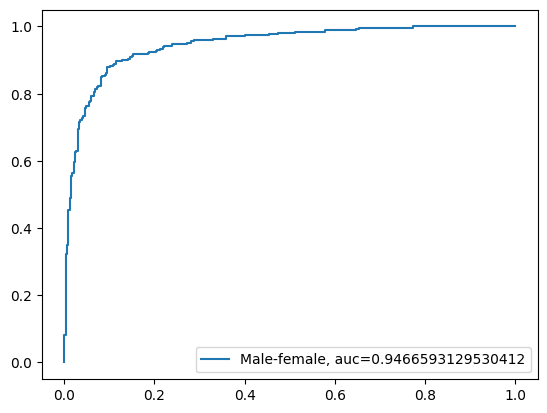

In [328]:
plt.plot(false_pos_rate, true_pos_rate, label="Male-female, auc="+str(auc))
plt.legend()
plt.show()